# **1. Definding problem**

This program detects heart attack, based off of 'Heart Attack Analysis & Prediction Dataset' on Kaggle



# **2. Loading dataset**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas import set_option

In [ ]:
#import the dataset
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Pythondata"
df = pd.read_csv("heart.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Pythondata


In [ ]:
#first 10 rows of dataset
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# **3. Analyzing data**

In [ ]:
#number of rows and columns in the dataset 
df.shape
print("Number of patients: {}\nNumber of features: {}".format(df.shape[0], df.shape[1]))

Number of patients: 303
Number of features: 14


In [ ]:
#missing values of columns 
null_value = df.isnull().sum()
print(sum(null_value))

0


In [ ]:
#types of columns
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
#describe statistics
set_option("precision", 3)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366,9.082,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683,0.466,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.967,1.032,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.624,17.538,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264,51.831,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.149,0.356,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528,0.526,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.647,22.905,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.327,0.470,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.040,1.161,0.0,0.0,0.8,1.6,6.2


In [ ]:
#correlation
cor = df.corr(method="pearson")
cor

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trtbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalachh,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exng,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


# **4.Visualizing data**

In [ ]:
#divide the dataset into 2 types of data
#categorial data
categorial_columns=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
categorial_data=df[categorial_columns]

#numerical data
numerical_columns=["age","trtbps","chol","thalachh","oldpeak"]
numerical_data=df[numerical_columns]

In [ ]:
#create cope data for visualization
c_df = df.copy()

c_df['sex'] = c_df['sex'].map({0:'Male', 1:'Female'})
c_df['exng'] = c_df['exng'].map({0:'False', 1:'True'})
c_df['cp'] = c_df['cp'].map({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})
c_df['fbs'] = c_df['fbs'].map({0:'False', 1:'True'})
c_df['output'] = c_df['output'].map({0:'Less Chance', 1:'More Chance'})

c_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Female,asymptomatic,145,233,True,0,150,False,2.3,0,0,1,More Chance
1,37,Female,non-anginal pain,130,250,False,1,187,False,3.5,0,0,2,More Chance
2,41,Male,atypical angina,130,204,False,0,172,False,1.4,2,0,2,More Chance
3,56,Female,atypical angina,120,236,False,1,178,False,0.8,2,0,2,More Chance
4,57,Male,typical angina,120,354,False,1,163,True,0.6,2,0,2,More Chance


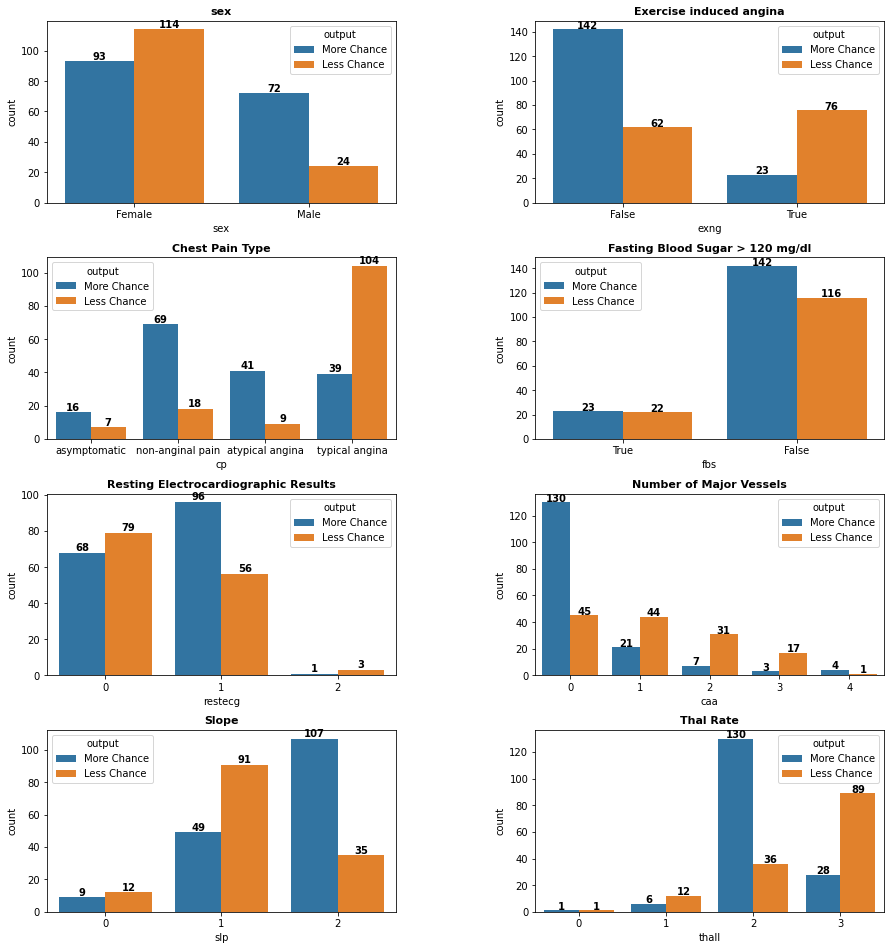

In [ ]:
##visualize categorial data:
def graph(name, u, title):
    sns.countplot(x=c_df[name], hue=c_df['output'], ax=u)
    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.set_title(title, fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+3),
                   ha="center", va='center', fontsize=10, fontweight="bold")

fig2, ax2 = plt.subplots(4,2, figsize=(15, 15), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["#ff0000","#ff8000","#ffff00","#80ff00","#00ff00", "#00ff80", "#00ffff", "#0080ff", "#0000ff", "#8000ff", "#ff00ff", "#ff0080"]

graph("sex", ax2[0,0], 'sex')
graph("exng", ax2[0,1], 'Exercise induced angina')
graph("cp", ax2[1,0], 'Chest Pain Type')
graph("fbs", ax2[1,1], 'Fasting Blood Sugar > 120 mg/dl')
graph('restecg', ax2[2,0], 'Resting Electrocardiographic Results')
graph('caa', ax2[2,1], 'Number of Major Vessels')
graph('slp', ax2[3,0], 'Slope')
graph('thall', ax2[3,1], 'Thal Rate')

plt.rcParams['axes.axisbelow'] = True

1    165
0    138
Name: output, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



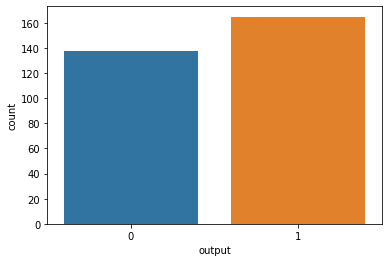

In [ ]:
#output distribution with (0) is having less chance of heart attack and (1) is having more chance of heart attack
print(df["output"].value_counts())
sns.countplot(df["output"], label = "Count")

In [ ]:
#divide dataset based on gender.(1) is male and (0) is female
M = df[df["sex"] == 1].reset_index()  
F = df[df["sex"] == 0].reset_index()   

Male Value Counts: 
0    114
1     93
Name: output, dtype: int64
Female Value Counts: 
1    72
0    24
Name: output, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



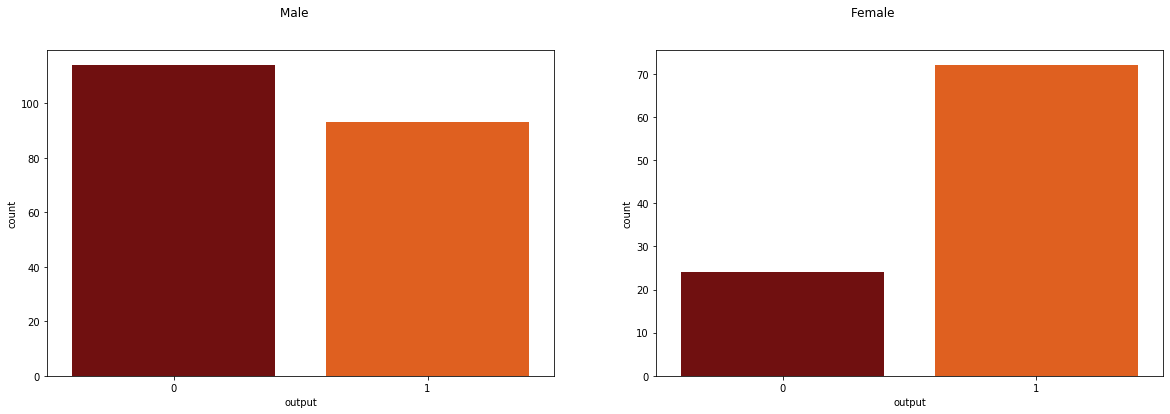

In [ ]:
#output distribution for gender.
print("Male Value Counts: \n{}".format(M['output'].value_counts()))
print("Female Value Counts: \n{}".format(F['output'].value_counts()))

fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Male                                                                                                                                            Female")
sns.countplot("output", data=M, palette='gist_heat',ax=ax1[0])
sns.countplot("output", data=F, palette='gist_heat',ax=ax1[1])
fig.show()

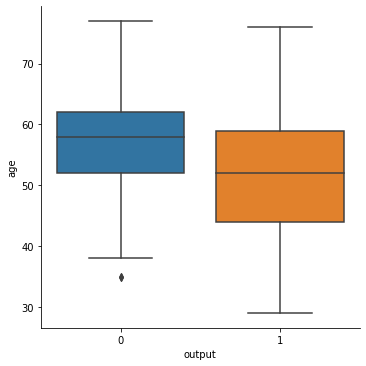

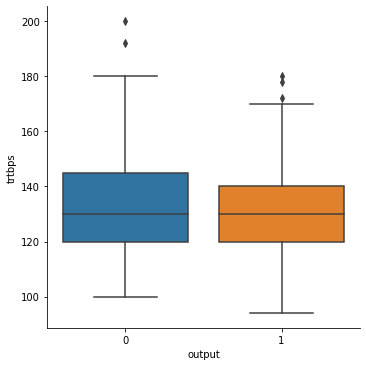

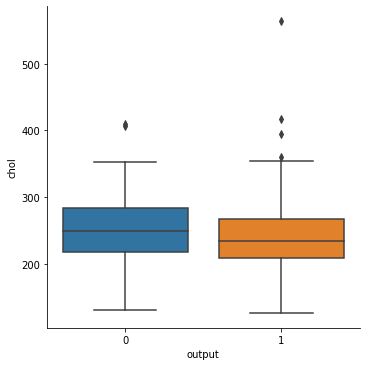

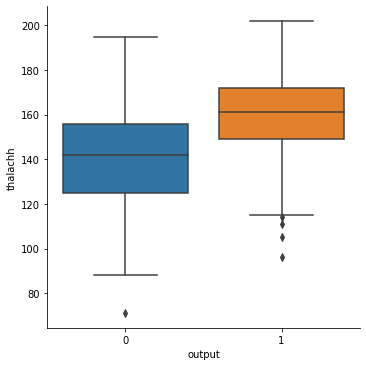

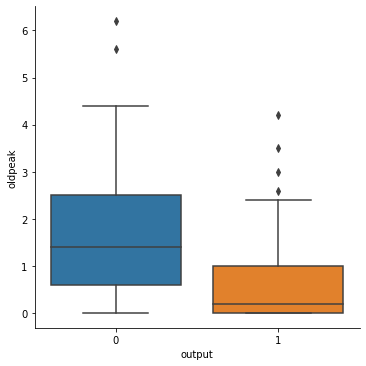

In [ ]:
#visualize numerical data
for y in numerical_columns: 
  sns.catplot(x="output", y=y, data=df, kind="box")

In [ ]:
#calculate the percentage of having more chance of heart attack (1) for both genders
print("Percent of male having more chance of heart attack = {} %" .format(round((len(M[M["output"]==1])/len(M)*100),2)))
print("Male average high-risk age = {} yrs\n" .format(round(M[M["output"]==1]["age"].mean())))

print("Percent of female having more chance of heart attack = {} %" .format(round((len(F[F["output"]==1])/len(F)*100),2)))
print("Female average high-risk age = {} yrs" .format(round(F[F["output"]==1]["age"].mean())))

Percent of male having more chance of heart attack = 44.93 %
Male average high-risk age = 51 yrs

Percent of female having more chance of heart attack = 75.0 %
Female average high-risk age = 55 yrs


***Based on the result we can assume that female seems to having more chance of heart attack than male but male is likely to have heart attack at a younger age.***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



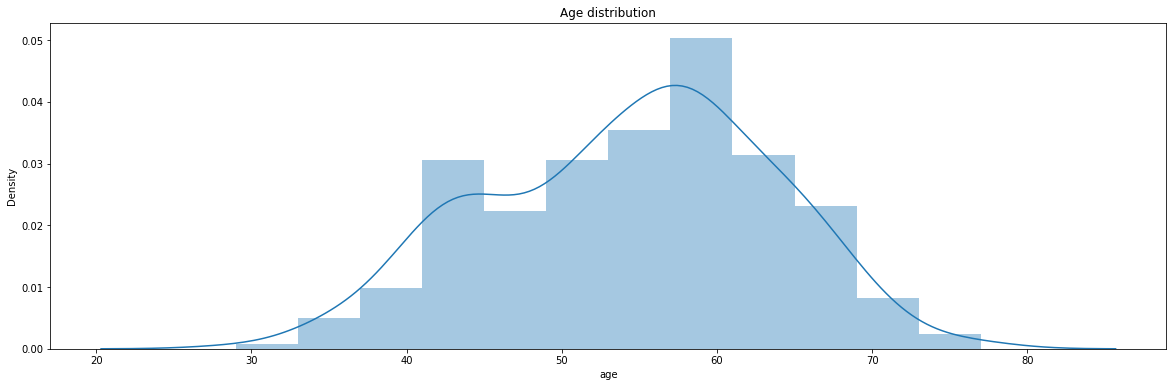

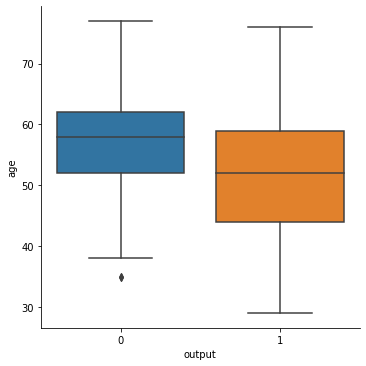

In [ ]:
#age distribution among who take part in the survey.
plt.figure(figsize=(20,6))
sns.distplot(df["age"],bins="auto")
plt.title("Age distribution")
plt.show()
sns.catplot(x="output", y="age", data=df, kind="box")

***Based on the plots we can say that most of the participants were between 40 - 60 age-group, only a few on the other sides. Besides, ones who have more chance of heart attack tend to be younger than ones who don't.***

In [ ]:
MC = df[df["output"]==1].reset_index()  #more chance
LC = df[df["output"]==0].reset_index()  #less chance

#Calculate general characteristics
print("     General Data")
print("Total Age")
print("Mean: {}".format(round(df["age"].mean())))
print("Median: {}".format(round(df["age"].median())))
print("Variance: {}".format(round(df["age"].var())))
print("Standard Deviation: {}\n".format(round((df["age"].std()),3)))

# Calculate gender specific characteristics
print("     Gender Specific Data")
print("For Male")
print("Mean: {}".format(round(M["age"].mean())))
print("Median: {}".format(round(M["age"].median())))
print("Variance: {}".format(round(M["age"].var())))
print("Standard Deviation: {}\n\n".format(round((M["age"].std()),3)))

print("For Female")
print("Mean: {}".format(round(F["age"].mean())))
print("Median: {}".format(round(F["age"].median())))
print("Variance: {}".format(round(F["age"].var())))
print("Standard Deviation: {}\n".format(round((F["age"].std()),3)))

# Calculate output specific characteristics
print("     Output Specific Data")
print("For Having more chance of heart attack")
print("Mean: {}".format(round(MC["age"].mean())))
print("Median: {}".format(round(MC["age"].median())))
print("Variance: {}".format(round(MC["age"].var())))
print("Standard Deviation: {}\n\n".format(round((MC["age"].std()),3)))

print("For Having less chance of heart attack")
print("Mean: {}".format(round(LC["age"].mean())))
print("Median: {}".format(round(LC["age"].median())))
print("Variance: {}".format(round(LC["age"].var())))
print("Standard Deviation: {}".format(round((LC["age"].std()),3)))

     General Data
Total Age
Mean: 54
Median: 55
Variance: 82
Standard Deviation: 9.082

     Gender Specific Data
For Male
Mean: 54
Median: 54
Variance: 79
Standard Deviation: 8.884


For Female
Mean: 56
Median: 57
Variance: 89
Standard Deviation: 9.409

     Output Specific Data
For Having more chance of heart attack
Mean: 52
Median: 52
Variance: 91
Standard Deviation: 9.551


For Having less chance of heart attack
Mean: 57
Median: 58
Variance: 63
Standard Deviation: 7.962


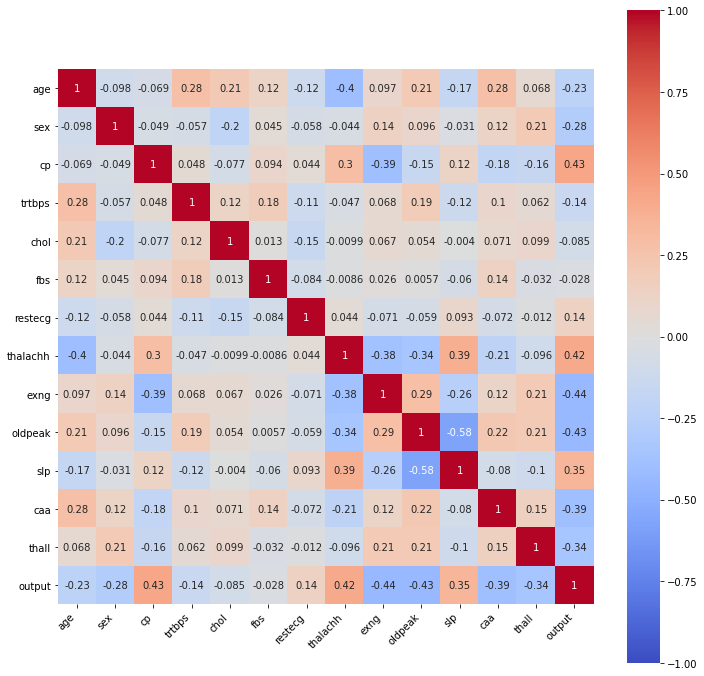

In [ ]:
#visualize the correlation
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

exng        0.437
cp          0.434
oldpeak     0.431
thalachh    0.422
caa         0.392
slp         0.346
thall       0.344
sex         0.281
age         0.225
trtbps      0.145
restecg     0.137
chol        0.085
fbs         0.028
Name: output, dtype: float64


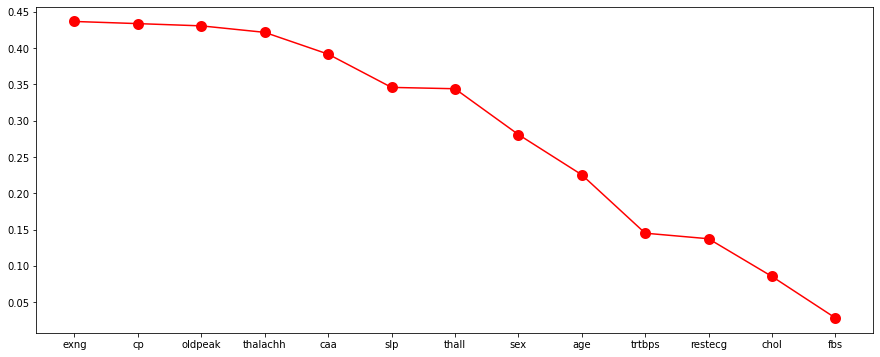

In [ ]:
#sort correlation from highest to lowest
C=abs(cor["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

In [ ]:
#check the outliers of numerical data
for k, v in numerical_data.items():
  Q1 = v.quantile(0.25)
  Q3 = v.quantile(0.75)
  IRQ = Q3 - Q1
  v_col = v[(v <= Q1 - 1.5 * IRQ) | (v >= Q3 + 1.5 * IRQ)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Number of {} outliers is {}/303: {} %".format(k,len(v_col),round((perc),3)))

Number of age outliers is 0/303: 0.0 %
Number of trtbps outliers is 13/303: 4.29 %
Number of chol outliers is 5/303: 1.65 %
Number of thalachh outliers is 1/303: 0.33 %
Number of oldpeak outliers is 8/303: 2.64 %


# **5. Validation set**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#split the dataset into independent (x) and dependent (y) datasets
X=df.iloc[:,:-1].values
Y=df.iloc[:, -1].values

In [ ]:
#split the dataset: 80% training, 20% testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [ ]:
#scale data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# **6. Evaluating algorithms**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#create a function for the models
def models (X_train, Y_train):

  #Logistic Regression
  logistic = LogisticRegression()
  logistic.fit(X_train, Y_train)

  #Decision Tree
  tree = DecisionTreeClassifier()
  tree.fit(X_train,Y_train)

  #Random Forest Classifier
  forest = RandomForestClassifier(n_estimators=20, random_state=10,max_depth=5)
  forest.fit(X_train, Y_train)

  #K-Neigbors Classifier
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(X_train, Y_train)

  #Support Vector Classifier
  svc = SVC(kernel="rbf", C=2)
  svc.fit(X_train, Y_train)

  #Extreme Gradient Boost Classifier
  xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
  xgb.fit(X_train, Y_train)

  #Print the models accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', logistic.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  print('[3]K-Neigbors Classifier Training Accuracy:', knn.score(X_train, Y_train))
  print('[4]Support Vector Classifier Training Accuracy:', svc.score(X_train, Y_train))
  print('[5]Extreme Gradient Boost Classifier Training Accuracy:', xgb.score(X_train, Y_train))
  return logistic, tree, forest, knn, svc, xgb

In [ ]:
#Apply to all the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.8429752066115702
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9586776859504132
[3]K-Neigbors Classifier Training Accuracy: 0.8471074380165289
[4]Support Vector Classifier Training Accuracy: 0.9462809917355371
[5]Extreme Gradient Boost Classifier Training Accuracy: 0.871900826446281


In [ ]:
#print models accuracy on the testing data
for i in range(len(model)):
  print('Model ', i)
  print(classification_report(Y_test,model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test))*100)
  print()

Model  0
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

85.24590163934425

Model  1
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.81      0.74      0.77        34

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

75.40983606557377

Model  2
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted 

# **7. Emsembling by stacking**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#stack 3 models
estimators = [('xgb', XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)),
              ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))),]
clf = StackingClassifier(estimators=estimators, final_estimator=SVC(kernel='rbf', C=2))

In [ ]:
# Set up k-fold
k_fold = KFold(n_splits = 5, random_state = 17, shuffle=True)

# Evaluate k-fold precision and recall
precision = cross_val_score(clf, X_train, Y_train, cv = k_fold, scoring = "precision_weighted")
recall = cross_val_score(clf, X_train, Y_train, cv = k_fold, scoring = "recall_weighted")
accuracy = cross_val_score(clf, X_train, Y_train, cv = k_fold, scoring = "accuracy")
print("K-fold Precision score: %s"%precision)
print("K-fold Recall score: %s"%recall)
print("K-fold Accuracy score: %s"%accuracy)

K-fold Precision score: [0.83651525 0.77024358 0.75088183 0.82958554 0.90542328]
K-fold Recall score: [0.83673469 0.75510204 0.75       0.8125     0.89583333]
K-fold Accuracy score: [0.83673469 0.75510204 0.75       0.8125     0.89583333]


In [ ]:
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

